<a href="https://colab.research.google.com/github/PurwadhikaDev/ZetaGroup_DTI_02_FinalProject/blob/main/Hotel_Booking_Cancellation_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Library dasar untuk analisis data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import lines, patches
import plotly.express as px

# Preprocessing & Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  # Encoding & scaling
import category_encoders as ce  # Encoder
from sklearn.base import BaseEstimator
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split # splitting data

# Missing Value
from sklearn.impute import SimpleImputer

#from eli5.sklearn import PermutationImportance
#from sklearn.inspection import permutation_importance
# from sklearn.inspection import permutation_importance

# Handling Imbaalnce Data
#from sklearn.utils.class_weight import compute_class_weight

# Clustering & Outlier Detection
from sklearn.cluster import DBSCAN  # Cek outlier dengan clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA  # Visualisasi cluster

# Modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# save the model
import pickle

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
#!pip install category_encoders

## **1. DATA UNDERSTANDING**
Dataset can be accessed in this link link text And its description link text

[link text](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)
And its description [link text](https://www.sciencedirect.com/science/article/pii/S2352340918315191)


In [4]:
data = pd.read_csv(r"/content/Raw_Data_Hotel_Bookings.csv")
data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1172,Resort Hotel,1,66,2015,August,34,16,3,5,2,...,No Deposit,240.0,NaN,0,Transient,154.00,0,0,Canceled,2015-06-15
28514,Resort Hotel,0,57,2016,September,40,29,2,5,2,...,No Deposit,40.0,NaN,0,Transient,86.43,0,0,Check-Out,2016-10-06
16375,Resort Hotel,0,0,2015,August,35,27,0,0,3,...,No Deposit,181.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-08-27
39385,Resort Hotel,0,78,2017,August,33,15,0,2,2,...,No Deposit,241.0,NaN,0,Transient,232.00,0,1,Check-Out,2017-08-17
111866,City Hotel,0,5,2017,May,19,13,2,2,2,...,No Deposit,9.0,NaN,0,Transient,145.00,0,1,Check-Out,2017-05-17
99256,City Hotel,0,6,2016,October,42,9,2,0,2,...,No Deposit,132.0,NaN,0,Transient,104.00,0,0,Check-Out,2016-10-11
98411,City Hotel,0,3,2016,September,40,25,2,2,1,...,No Deposit,NaN,45.0,0,Transient,0.00,0,0,Check-Out,2016-09-29
1991,Resort Hotel,0,1,2015,September,39,26,1,1,2,...,No Deposit,240.0,NaN,0,Transient,89.00,0,1,Check-Out,2015-09-28
90710,City Hotel,0,18,2016,June,24,8,0,2,2,...,No Deposit,9.0,NaN,0,Transient,121.00,1,2,Check-Out,2016-06-10
18161,Resort Hotel,0,20,2015,November,45,2,2,5,2,...,No Deposit,69.0,NaN,0,Transient,26.10,0,0,Check-Out,2015-11-09


In [5]:
display(
    # numerical variables
    data.describe(),
    # categorical variables
    data.describe(include='object')
)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


- Min and max values are ​​vary. Need to rescaling for gradient based models if we use Logistic Regression & XGBoost for optimal performance.
- High SD in days_in_waiting_list (17.67), Data has large spread, need to check for outliers.
- Column adr has negative values, Need to check for errors in the data.
- Many columns with 0 values ​​for most of the data, Need to consider whether all these features are relevant or should be removed.

In [6]:
data.shape

(119390, 32)

In [7]:
# Rows & Column
print(f'Jumlah baris dan kolom: {data.shape[0]} baris dan {data.shape[1]} kolom')

# Duplicate Checking
print(f"Jumlah data duplikat: {data.duplicated().sum()} baris")

print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

Jumlah baris dan kolom: 119390 baris dan 32 kolom
Jumlah data duplikat: 31994 baris

Jumlah missing values per kolom:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes      

In [8]:
# Quality data checking
quality_df = pd.DataFrame({"columns": data.columns,"data_type": data.dtypes,"null_value(%)": data.isnull().mean() * 100,
                           "n_unique": data.nunique()})

display(quality_df)

,columns,data_type,null_value(%),n_unique
hotel,hotel,object,0.000000,2
is_canceled,is_canceled,int64,0.000000,2
lead_time,lead_time,int64,0.000000,479
arrival_date_year,arrival_date_year,int64,0.000000,3
arrival_date_month,arrival_date_month,object,0.000000,12
arrival_date_week_number,arrival_date_week_number,int64,0.000000,53
arrival_date_day_of_month,arrival_date_day_of_month,int64,0.000000,31
stays_in_weekend_nights,stays_in_weekend_nights,int64,0.000000,17
stays_in_week_nights,stays_in_week_nights,int64,0.000000,35
adults,adults,int64,0.000000,14


- This dataset has rows and columns: 29,264 rows and 32 columns, has duplicate data: 5,014 rows need to be viewed further for deletion or not.

- Data Variable Types

a. Numerical
- Discrete: previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests
- Continuous: adr

b. Categorical
- Nominal: country, market_segment, deposit_type, customer_type, reserved_room_type, is_canceled

- Data Quality
- The data type of each variable is asuitable (no need to conversion).
- There are missing values ​​in:

a. country - 1.57%

b. agent - 20.65%

c. company - 91.97% (Very high, lots of empty data, because not all hotel guests book through a company or agent)

Beberapa columns, tidak akan dikelompokkan sebagai categorical/continues seperti;
- is_canceled	Target (label), bukan fitur
- company	Banyak nilai NaN, karena tidak semua guest reservasi melalui company, sehingga company ID kosong
- reservation_status	Kategori yang bergantung pada is_canceled, arena status reservasi sangat dipengaruhi oleh apakah pemesanan dibatalkan atau tidak.
- reservation_status_date	Tanggal, lebih cocok dikonversi ke format lain
- agent	Banyak nilai kosong, karena tidak semua guest reservasimelalui agent, sehingga agent ID kosong

Berdasarkan referensi di bawah, ada beberapa faktor yang dapat mempengaruhi customer melakukan pembatalan pesanan:
- Duration of stay (Lead time)
- Time of booking
- Customer types
- Previous_cancelled
- market segment (order lewat mana, OTA, Direct, dll)

References:
- [link text](https://www.rateboard.io/en/blog/hotel-cancellations-pose-a-great-challenge/)
- [link text](https://www.researchgate.net/publication/310504011_Predicting_Hotel_Booking_Cancellation_to_Decrease_Uncertainty_and_Increase_Revenue)
- [link text](https://www.researchgate.net/publication/372770400_Research_on_the_Influencing_Factors_of_Cancellation_of_Hotel_Reservations)

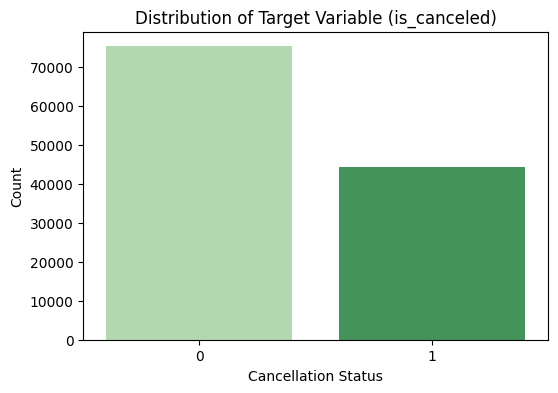

In [9]:
## untuk melihat distribusi target variable
plt.figure(figsize=(6,4))
sns.countplot(x=data['is_canceled'], palette='Greens')
plt.title('Distribution of Target Variable (is_canceled)')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

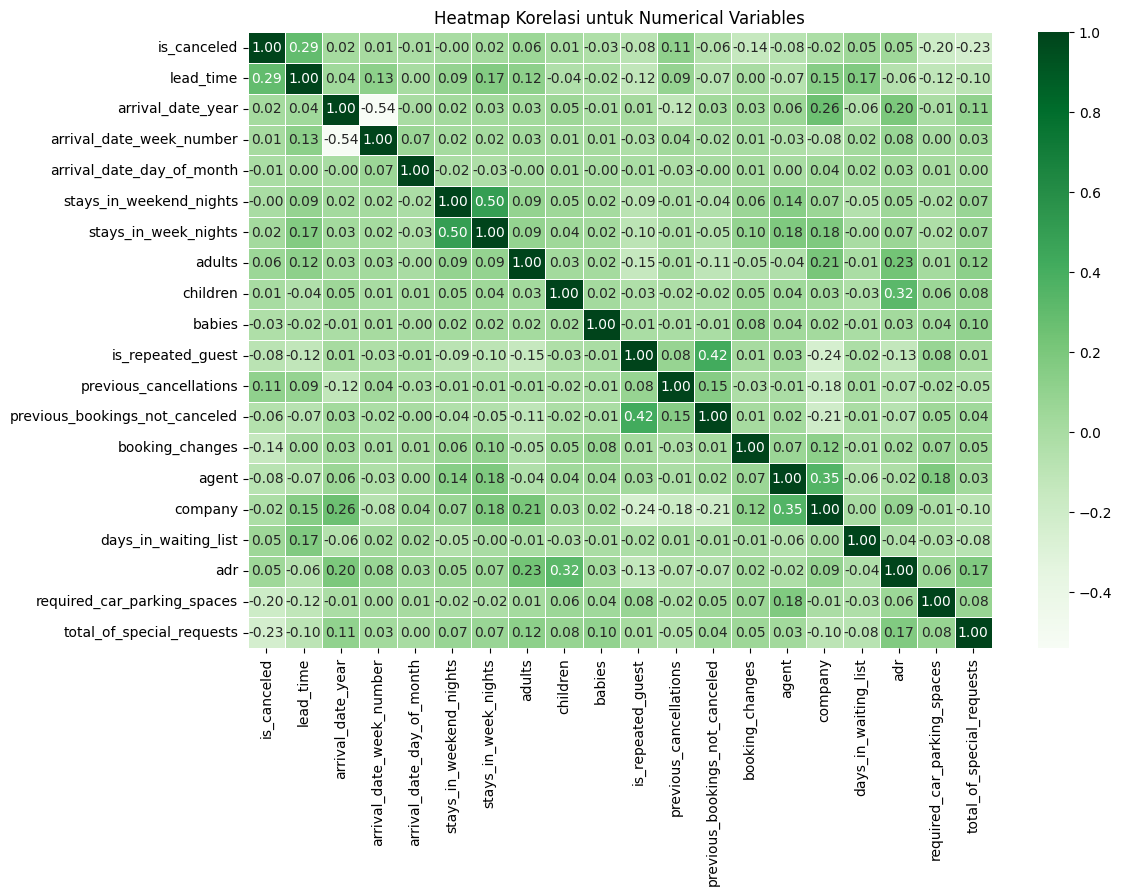

In [10]:
num_var1 = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
            'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

corr_matrix = data[num_var1].corr()

#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
plt.title("Heatmap Korelasi untuk Numerical Variables")
plt.show()

1. Skala korelasi berkisar dari -1 hingga 1:
- 1: Korelasi sempurna positif (ketika satu variabel naik, variabel lain juga naik).
- 0: Tidak ada hubungan linear antara dua variabel.
-1: Korelasi sempurna negatif (ketika satu variabel naik, variabel lain turun).
Warna hijau tua menandakan korelasi tinggi (baik positif maupun negatif), sedangkan warna hijau muda menunjukkan korelasi lebih lemah.
2. Korelasi antara stays_in_week_nights dan stays_in_weekend_nights
Korelasi antara stays_in_week_nights dan stays_in_weekend_nights sebesar 0.50, yang menunjukkan hubungan positif sedang.
Artinya, tamu yang menginap lebih lama pada hari kerja cenderung juga menginap lebih lama di akhir pekan, tetapi tidak selalu.
3. Faktor yang Berhubungan dengan Pembatalan (is_canceled)
is_canceled memiliki korelasi 0.29 dengan lead_time, yang berarti semakin lama waktu antara pemesanan dan kedatangan, semakin besar kemungkinan reservasi dibatalkan.
is_canceled memiliki korelasi negatif dengan required_car_parking_spaces (-0.20), yang berarti tamu yang memesan tempat parkir cenderung lebih jarang membatalkan.
4. Hubungan dengan Harga Kamar (adr)
adr (Average Daily Rate) memiliki korelasi 0.32 dengan days_in_waiting_list, yang mungkin menunjukkan bahwa pemesanan yang masuk daftar tunggu cenderung memiliki harga lebih tinggi.
5. Variabel yang Berhubungan dengan Tamu Berulang (is_repeated_guest)
is_repeated_guest memiliki korelasi 0.42 dengan previous_bookings_not_canceled, menunjukkan bahwa tamu yang sering menginap di hotel cenderung memiliki riwayat reservasi yang tidak dibatalkan.
Kesimpulan:

Ada hubungan positif sedang antara stays_in_week_nights dan stays_in_weekend_nights, menunjukkan bahwa beberapa tamu cenderung menginap dalam jangka waktu yang lebih panjang.
Pembatalan reservasi lebih sering terjadi ketika lead time lebih panjang.
Tamu yang memesan tempat parkir cenderung lebih sedikit membatalkan reservasi.
Harga kamar (adr) lebih tinggi untuk reservasi yang masuk daftar tunggu.
Tamu yang kembali menginap di hotel memiliki riwayat pemesanan yang lebih stabil.

#### Categorical Variables

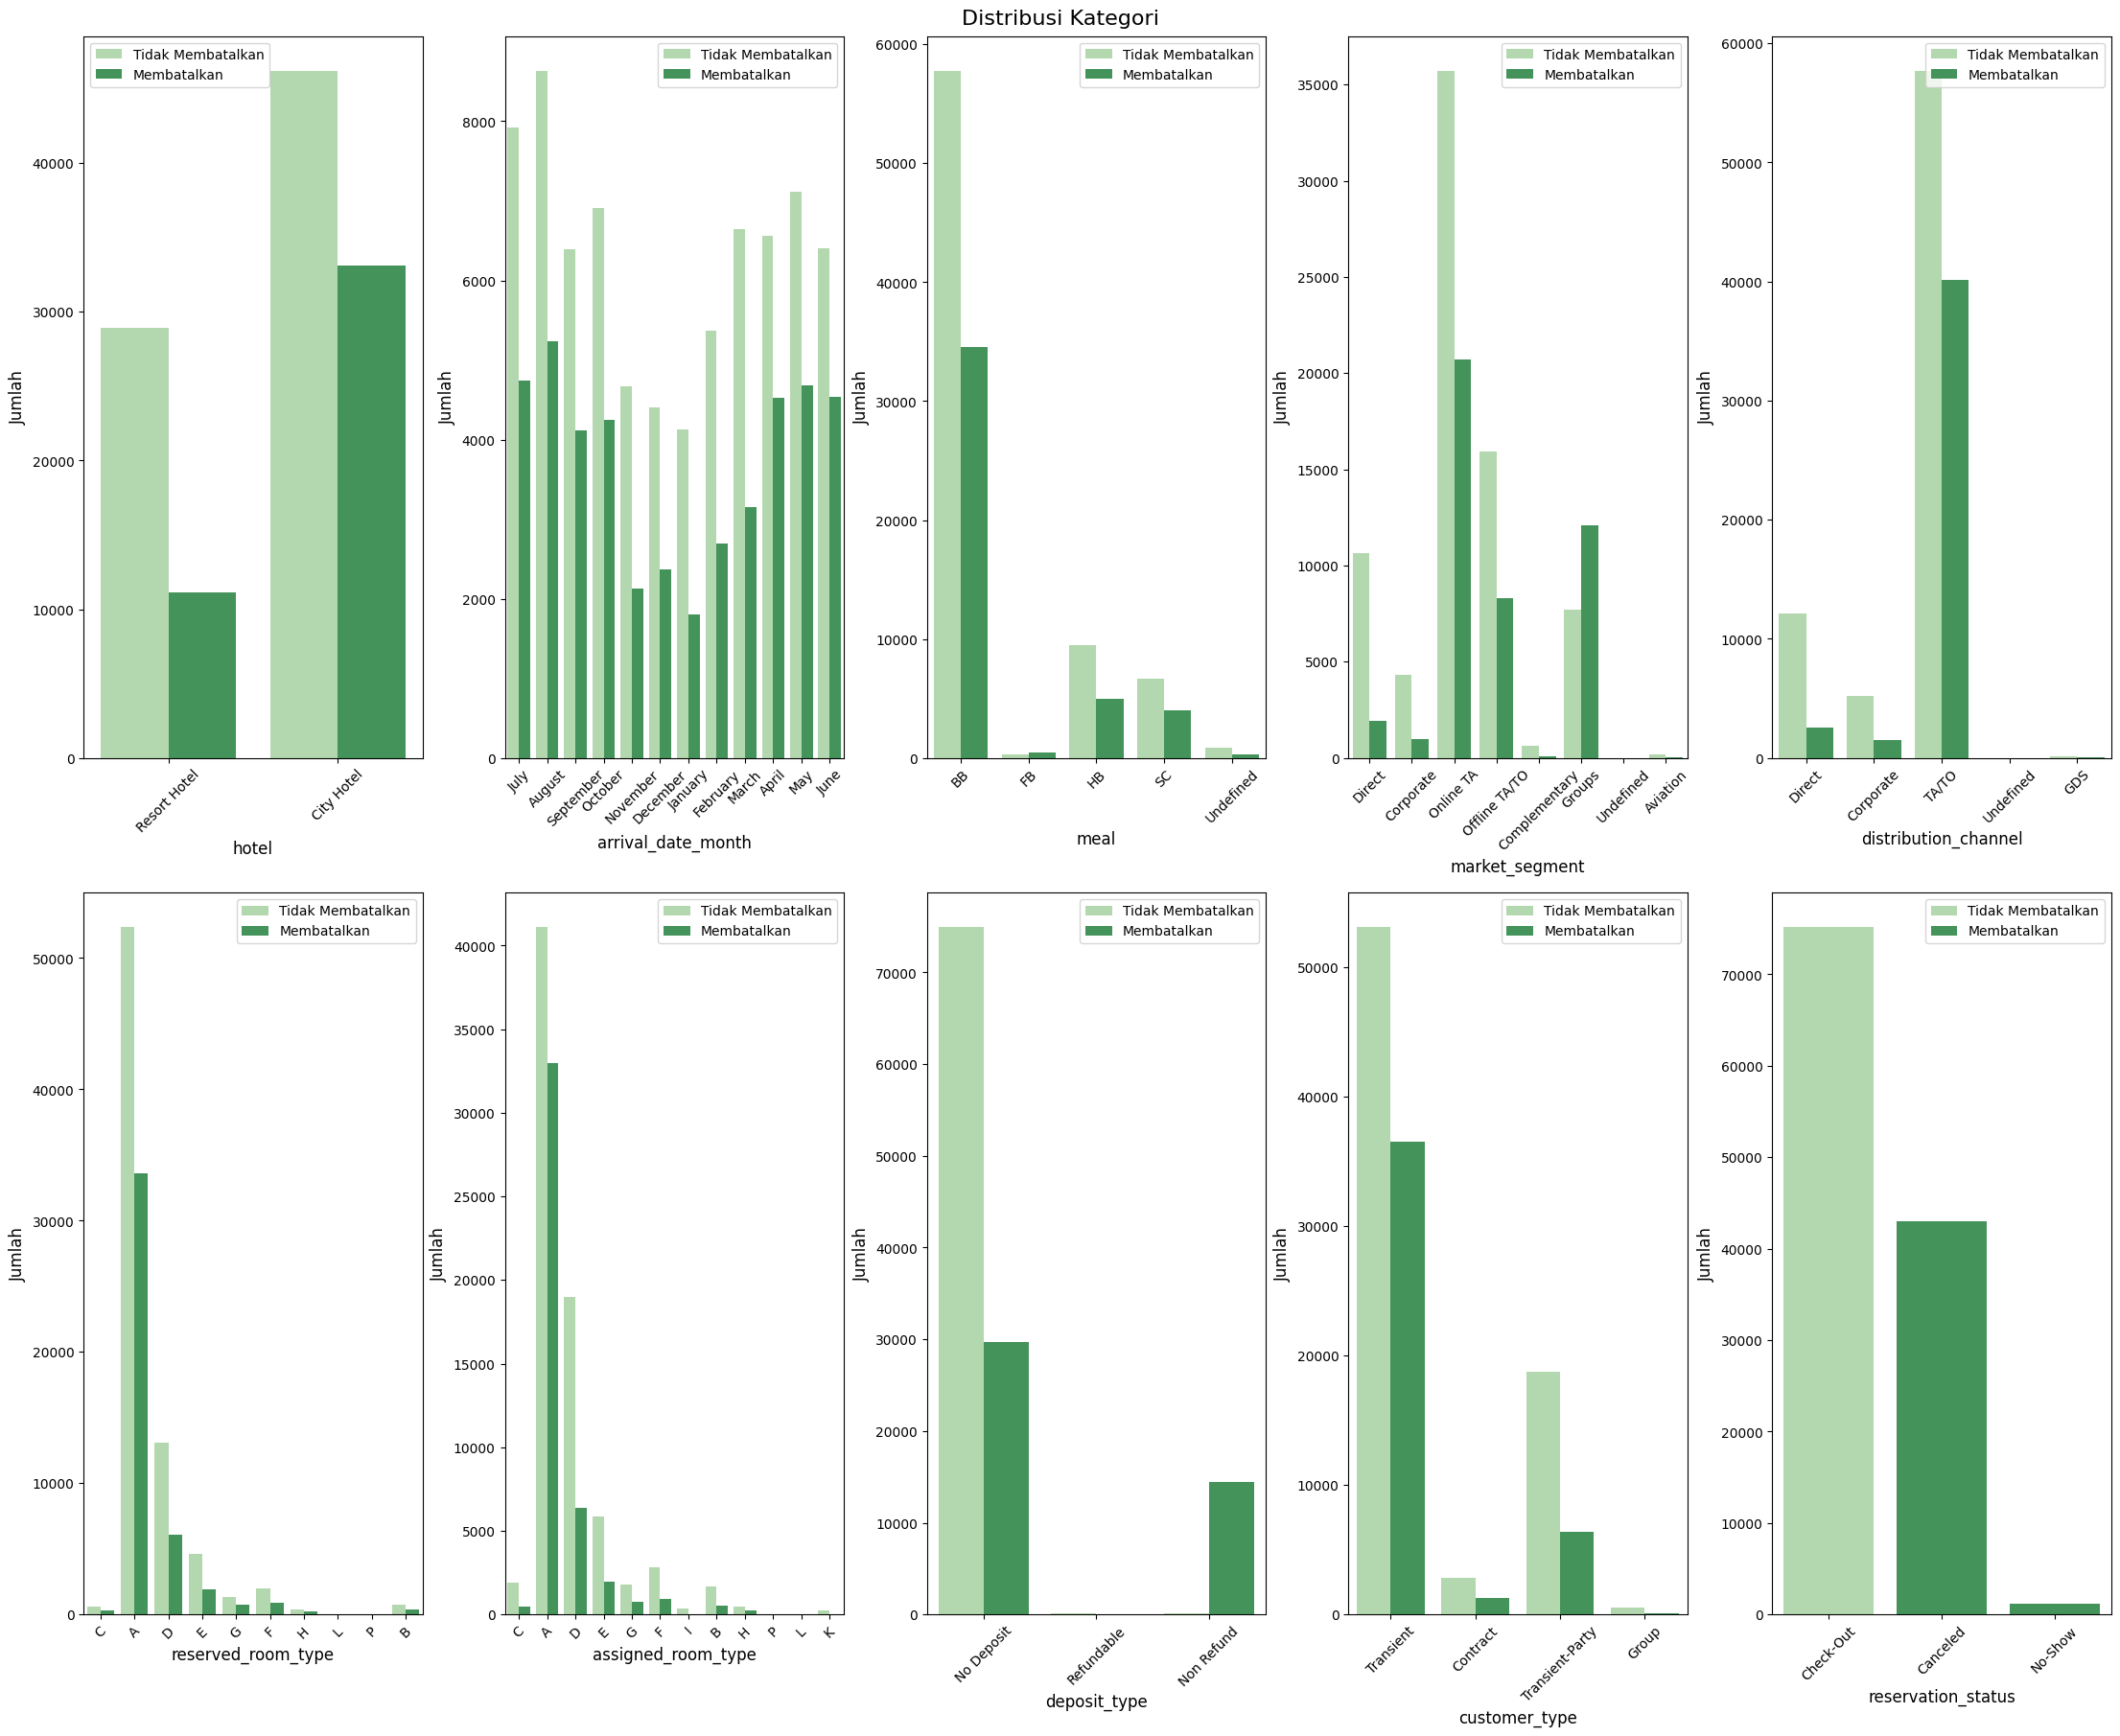

In [11]:
categ_val = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
             'distribution_channel', 'reserved_room_type', 'assigned_room_type',
             'deposit_type', 'customer_type', 'reservation_status']

fig, axes = plt.subplots(2,5, figsize=(22, 18), constrained_layout=True)
fig.suptitle("Distribusi Kategori", fontsize=16)

for col, ax in zip(categ_val, axes.flatten()):
    sns.countplot(data=data, x=col, hue='is_canceled', palette='Greens', ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Jumlah", fontsize=12)
    ax.legend(['Tidak Membatalkan', 'Membatalkan'], fontsize=10)

for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

1. Hotel Type

Dua jenis hotel: Resort Hotel dan City Hotel.
City Hotel memiliki lebih banyak pemesanan, tetapi juga tingkat pembatalan yang lebih tinggi dibandingkan Resort Hotel.

2. Arrival Date Month

Pemesanan tersebar di berbagai bulan, dengan pola tertentu yang menunjukkan musim ramai.
Bulan dengan pemesanan tinggi kemungkinan memiliki tingkat pembatalan lebih tinggi.

3. Meal Type

Beberapa tipe makanan seperti BB (Bed & Breakfast) lebih populer dibandingkan opsi lain seperti FB (Full Board), HB (Half Board), SC (Self Catering).
Mayoritas pelanggan memilih paket makanan BB, tetapi distribusi pembatalan cukup merata.
4. Market Segment

Pemesanan berasal dari berbagai segmen pasar seperti Online TA (Travel Agent), Direct, Corporate, dan Offline TA/TO (Tour Operators).
Segmen Online TA memiliki volume pemesanan tinggi, tetapi juga tingkat pembatalan yang lebih tinggi dibandingkan segmen lain.
5. Distribution Channel

Mayoritas pemesanan dilakukan melalui TA/TO (Travel Agents & Tour Operators), diikuti oleh Direct dan GDS.
Pembatalan lebih sering terjadi di TA/TO dibandingkan kanal distribusi lainnya.
6. Reserved Room Type

Sebagian besar reservasi berada di kategori A, dengan penurunan jumlah pada kategori lain.
Tingkat pembatalan tinggi pada kamar populer.
7. Assigned Room Type

Mirip dengan reserved_room_type, tetapi menunjukkan kamar yang benar-benar diberikan kepada pelanggan.
Beberapa pelanggan mungkin menerima tipe kamar yang berbeda dari yang mereka pesan.
8. Deposit Type

Mayoritas pemesanan dilakukan tanpa deposit, sedangkan beberapa dengan Non-refundable deposit memiliki lebih sedikit pembatalan karena pelanggan sudah membayar di awal.
9. Customer Type

Tipe pelanggan Transient mendominasi pemesanan dan pembatalan.
Contract dan Group memiliki lebih sedikit pembatalan.
10. Reservation Status

Status reservasi dibagi menjadi Check-Out, Canceled, No-Show.
Pembatalan lebih banyak daripada "No-Show," menunjukkan bahwa pelanggan sering membatalkan sebelum kedatangan.

Kesimpulan:

Online TA/TO dan Direct booking memiliki lebih banyak pembatalan.
Tipe hotel, bulan kedatangan, dan tipe deposit berpengaruh terhadap tingkat pembatalan.
Transient customers lebih sering membatalkan dibanding tipe lain.
Berdasarkan pola ini, hotel bisa mengoptimalkan strategi seperti mengurangi fleksibilitas pembatalan untuk pemesanan Online TA/TO, memberikan insentif bagi pelanggan setia, dan mengelola stok kamar lebih efektif.

#### Country
Apakah negara yang sering membatalkan adalah warga portugal atau no portugal?

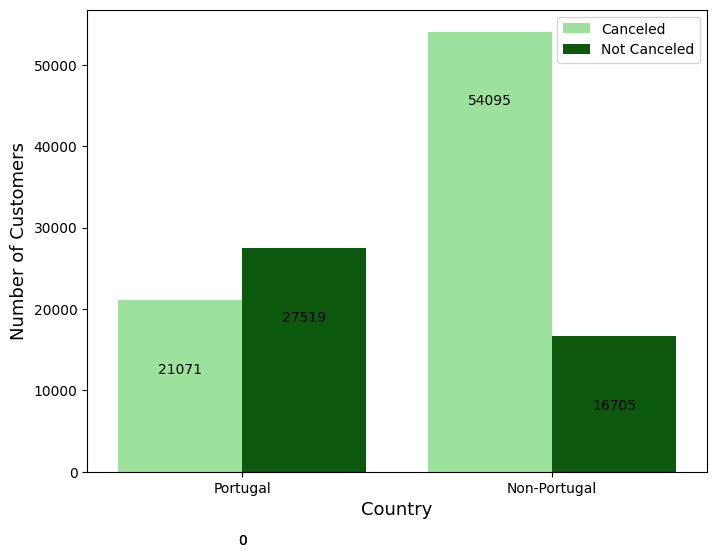

In [12]:
def country(df):
    if df['country'] == 'PRT':
        return "Portugal"
    else:
        return "Non-Portugal"

# DataFrame sementara untuk plot kolom country
df_categ = data.copy()
df_categ['country'] = df_categ.apply(country, axis=1)

# figsize
plt.figure(figsize=(8,6))

# sns.countplot(df_categ, x='country');

country_plot = sns.countplot(
    data=df_categ,
    x="country",
    hue='is_canceled',
    palette=['lightgreen', 'darkgreen']
)

# annotation
for bar in country_plot.patches:
    country_plot.annotate(
        format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2),
        ha='center',
        va='center',
        size=10,
        xytext=(0, -50),
        textcoords='offset points')

# x dan y label
plt.xlabel("Country", loc='center', size=13)
plt.ylabel("Number of Customers", loc='center', size=13)

# legend
country_plot.legend(['Canceled', 'Not Canceled'], loc='upper right')

# show
plt.show()

- Jumlah customer yang negara asalnya bukan dari Portugal dan tidak membatalkan pesanan lebih banyak daripada customer dengan negara asalnya Portugal.
- Jumlah customer yang negara asalnya dari Portugal dan membatalkan pesanan lebih banyak daripada customer dengan negara asalnya bukan dari Portugal.

Related dengan business problem analyutic yang sudah kita lakukan sebelumnya, jika
Ini sesuai dengan

kolom country ini merupakan asal negara pemesan, jika ini dipertimbangkan dalam pemodelan, hal ini tentu akan bersifat subjektif. Negara asal dalam hal ini bukan negara tempat di mana customer berdomisili. Jadi, mungkin saja customer dengan country "A", tapi tidak berdomisili di country "A" tersebut.

#### Check Data Imbalance

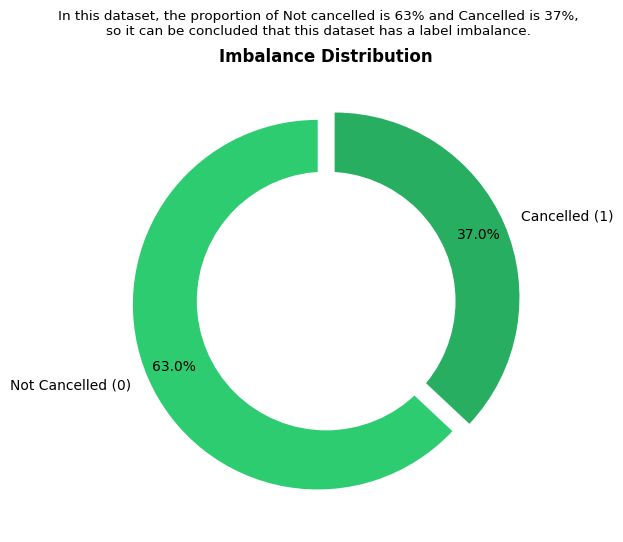

In [13]:
# Buat figure dan axis
fig, ax = plt.subplots(figsize=(6, 6))

# Pie chart
ax.pie([63, 37], labels=['Not Cancelled (0)', 'Cancelled (1)'],
       autopct='%1.1f%%', startangle=90, pctdistance=0.85,
       colors=['#2ecc71', '#27ae60'], explode=(0.05, 0.05))

# Tambahkan lingkaran di tengah untuk membuat efek donut
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
ax.add_artist(centre_circle)

# Tambahkan title utama
plt.title("Imbalance Distribution", fontsize=12, fontweight='bold')

# Tambahkan subtitle tanpa menggeser plot
plt.suptitle(
    "In this dataset, the proportion of Not cancelled is 63% and Cancelled is 37%,\n"
    "so it can be concluded that this dataset has a label imbalance.",
    fontsize=9.7, color='black'
)

# Tampilkan plot
plt.show()


- Terdapat imbalance label pada dataset ini, sehingga salah satu cara untuk mengatasi hal ini dengan menggunakan metric evaluasi yang robust terhadap imbalance dataset. Dalam hal ini saya menggunakan metric evaluasi Weighted F1-Score & Recall.
- Cancellation rate pada dataset ini sebesar 37% atau bisa dikatakan bahwa 3 dari 10 pesanan dibatalkan. Berdasarkan jurnal pada problem statement, hal ini berpengaruh negatif terhadap revenue hotel.

## DATA PREPARATION

In [14]:
# drop duplikat data
data = data.drop_duplicates(keep='last', ignore_index=True)
data.shape

(87396, 32)

#### Outliers Cheking Using DBSSCAN

## FEATURE ENGINEERING & PIPELINE CREATION

In [15]:
X = data.drop(columns=["is_canceled"])  # Hapus target dari fitur
y = data["is_canceled"]

In [16]:
# Creating a Train and test dataset. We set a random state so we can have reproducible Train and Test dataset for our project
# We then put the test set away and not peek at it until we chose our model! .
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)

In [17]:
# Creating a class dummy estimator for pipeline
class DummyEstimator(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def score(self, X, y=None):
        return 0

Some columns, wont be grouped as categorical/continues such as;
- is_canceled Target (label), not a feature
- company Many NaN values, because not all guest reservations go through a company, so the company ID is empty
- reservation_status A category that depends on is_canceled, because the reservation status is highly influenced by whether the booking is canceled or not.
- reservation_status_date Date, better converted to another format
- agent Many empty values, because not all guest reservations go through an agent, so the agent ID is empty

In [18]:
# Selecting categorical columns while removing irrelevant columns
#categorical_cols = (X.dtypes == object)
#categorical_cols[['is_canceled','company','reservation_status','reservation_status_date','agent']]=False


# Selecting continuous columns while removing irrelevant columns
#continuous_cols = (X.dtypes != object)
#continuous_cols[['is_canceled','company','reservation_status','reservation_status_date','agent']]=False

In [19]:
#Categorical Column
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['company', 'reservation_status', 'reservation_status_date', 'agent'], errors='ignore')

#Continues Column
continuous_cols = X.select_dtypes(exclude=['object']).columns
continuous_cols = continuous_cols.drop(['company', 'reservation_status', 'reservation_status_date', 'agent'], errors='ignore')

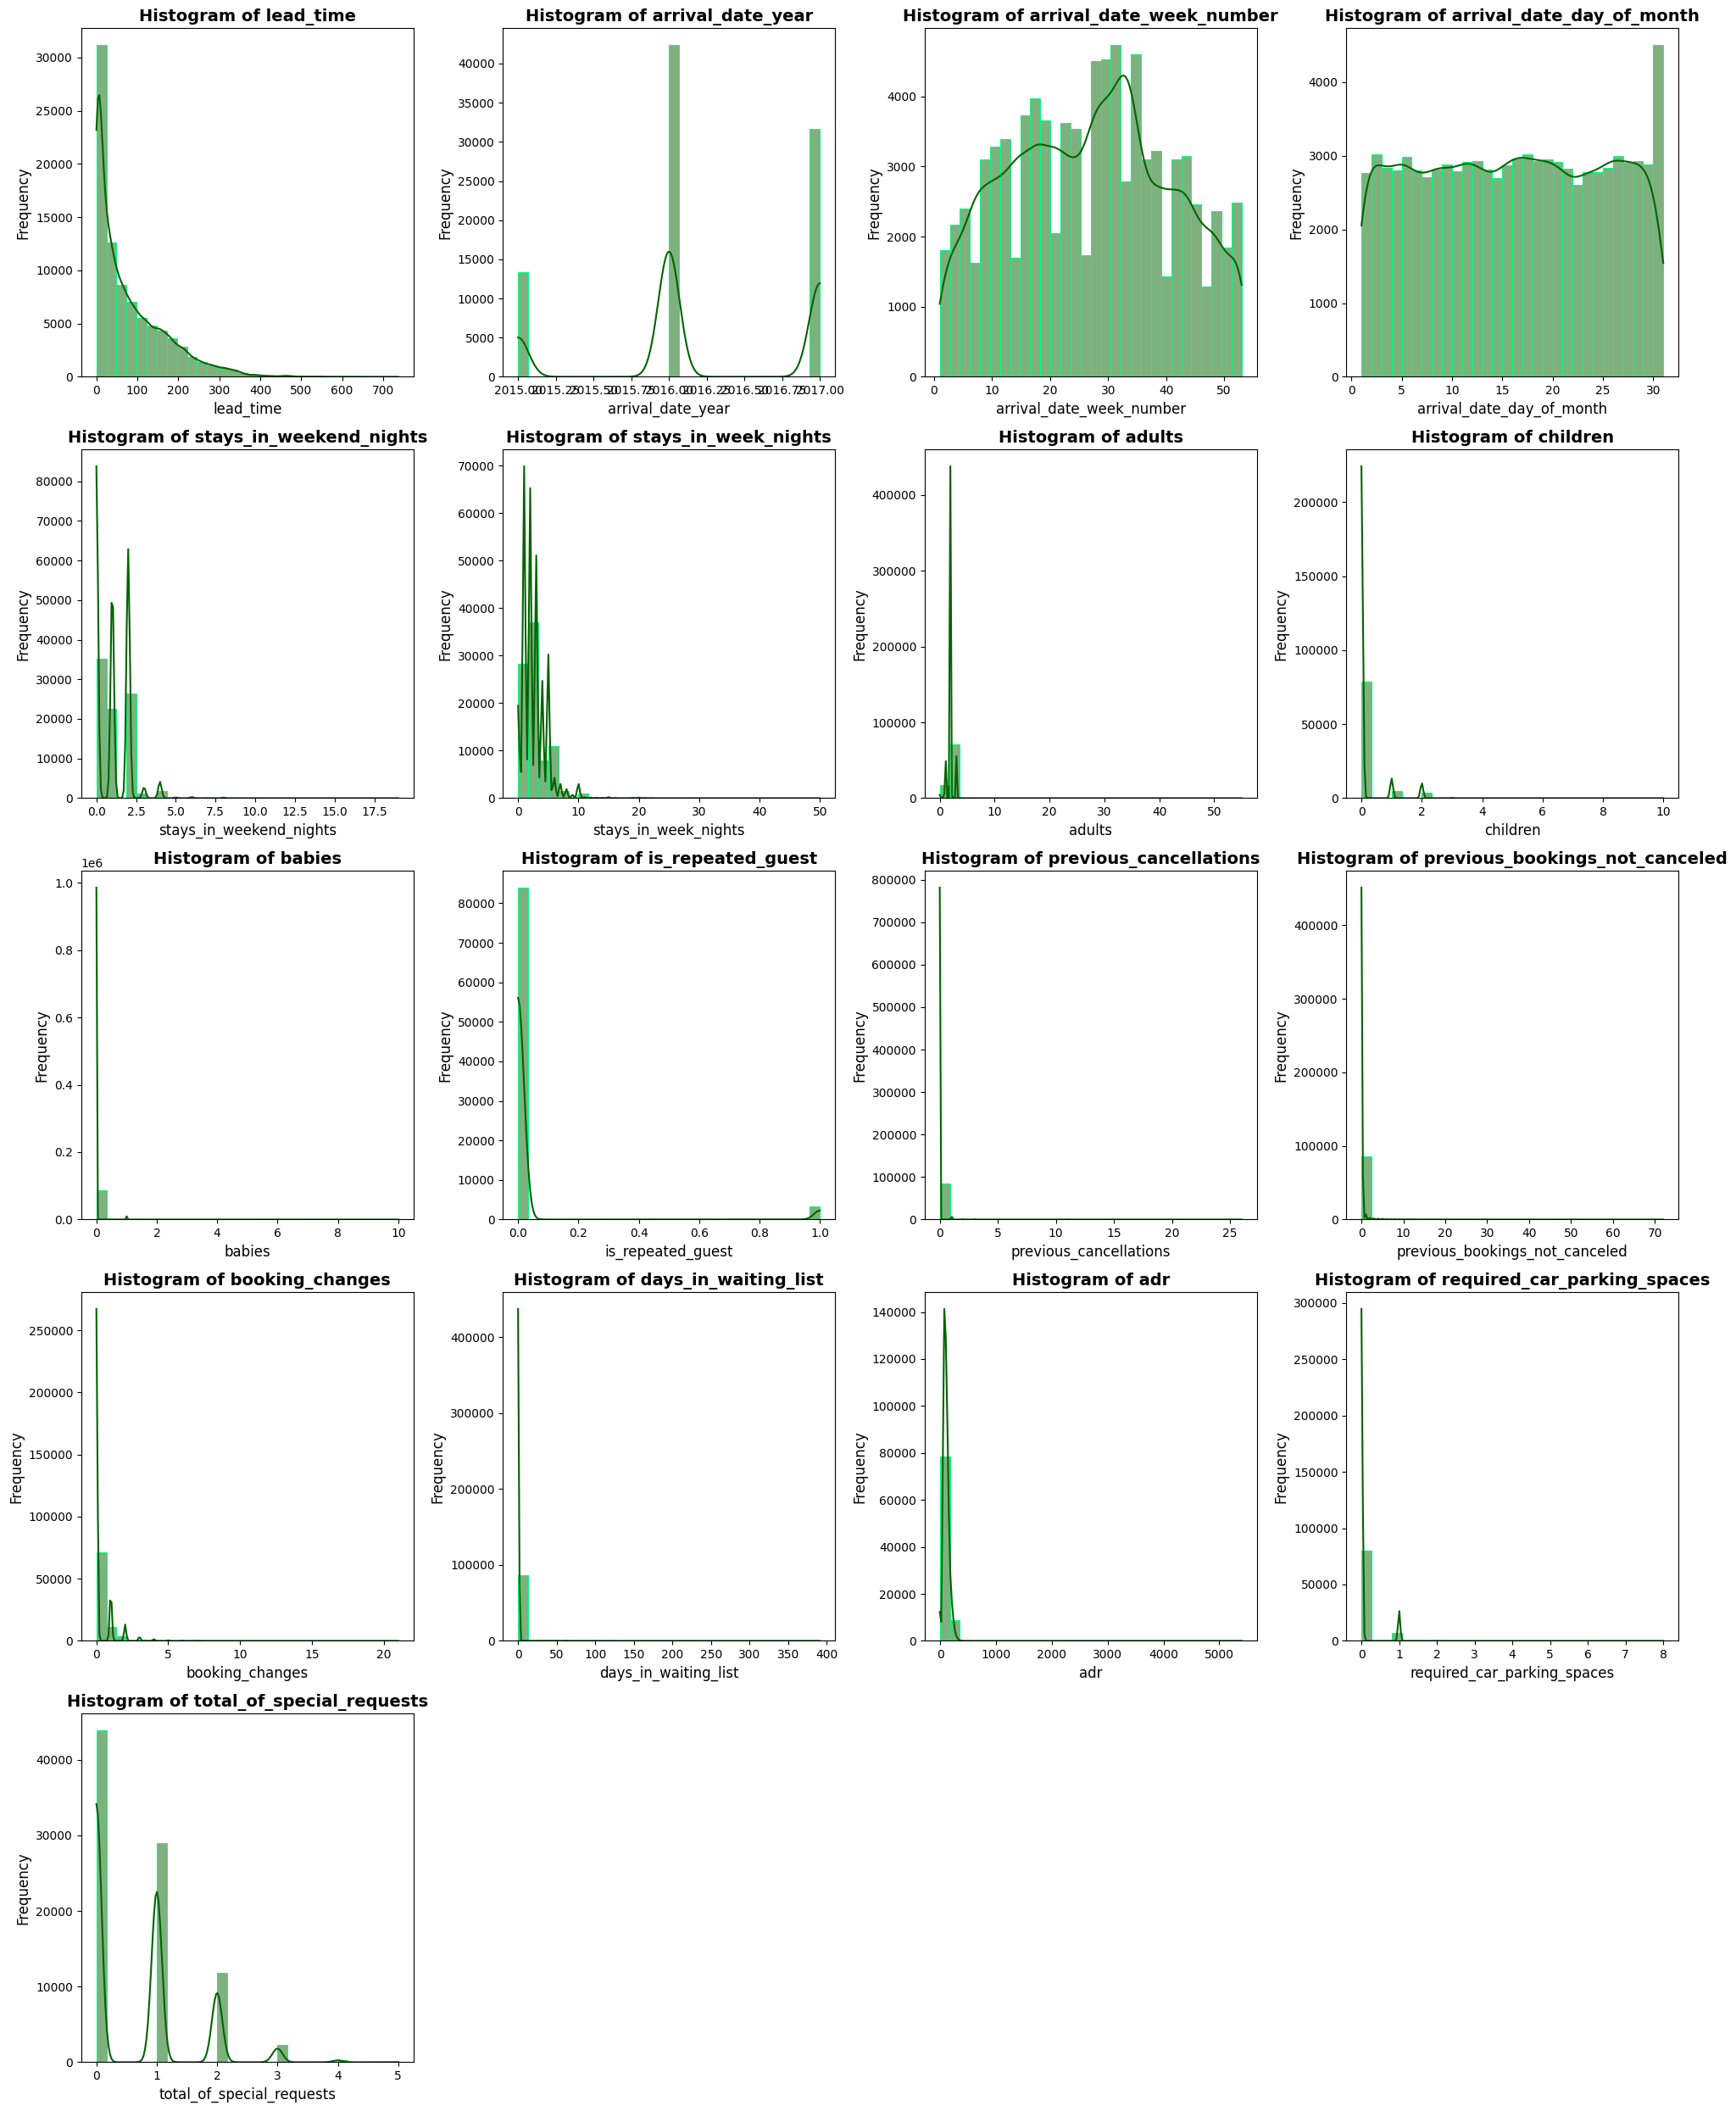

In [20]:
# Checking (Skewness)
num_cols = X.loc[:, continuous_cols].columns
n_cols = len(num_cols)  # Jumlah kolom numerik

# Tentukan jumlah baris & kolom agar membentuk grid
# Max.4 lines
n_rows = int(np.ceil(n_cols / 4))
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))

# Flatten axes
axes = axes.flatten()

# Looping for all cont. columns
for i, col in enumerate(num_cols):
    sns.histplot(X[col], kde=True, bins=30, color="#006400", fill=True, edgecolor="#00FF7F", ax=axes[i])
    axes[i].set_title(f"Histogram of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hapus sisa subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Lead Time & ADR. Distribusi condong ke kanan, menunjukkan banyaknya nilai kecil dan sedikit nilai besar.
- Jumlah Orang (Adults, Children, Babies). Mayoritas data berada di angka 0–2, mencerminkan kebanyakan reservasi dilakukan untuk 1-2 orang.
- Arrival Date Variables. Variabel terkait tanggal menunjukkan pola penyebaran yang lebih merata.
- Special Requests & Cancellations. Data mayoritas bernilai rendah, mencerminkan sedikit pelanggan yang sering melakukan pembatalan atau permintaan khusus.

Maka dari itu, dilakukan transformation pada categorical variables dengan Onehotencoding utnuk meruabh ke data bianry, dan caling untuk continous data.

In [21]:
#Applying transformation on columns
#OneHotEncoding Categorical variables - Change into bianry
# Scaling the Continuous data

#from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
#from sklearn.pipeline import Pipeline

#preprocessing = ColumnTransformer([
                                #('categorical', OneHotEncoder(handle_unknown='ignore'),categorical_cols ),
                                #('continuous', QuantileTransformer(), continuous_cols)
                                #])

# Using simpleimputer to handle missing values. We are replacing the values with most frequent values
#pipe = Pipeline([
                #('imputation',SimpleImputer(missing_values=np.nan,strategy="most_frequent")),
                #('preprocessing',preprocessing),
                #('model',DummyEstimator())])

In [22]:
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
preprocessing = ColumnTransformer([
    ('categorical', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputer dulu baru encoding
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols),

    ('continuous', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Bisa pakai 'mean' kalau mau
        ('scaler', QuantileTransformer())
    ]), continuous_cols)
])

# Pipeline
pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('model', DummyEstimator())
])

#### Creating custom evaluation metriks

GridSearchCV dan metode tuning lainnya butuh metrik evaluasi dalam format yang bisa diterima (scoring parameter).
make_scorer() mengubah f1_score dan recall_score menjadi bentuk yang bisa dipakai untuk menilai performa model saat tuning.

In [23]:
# We create a weighted f1 and recall score which is our evaluation metric for choosing models. Weighted F1 is sensitive to class imbalance,and will give a balanced accuracy score
# We do not choose AUC, since AUC can be misleading for class imbalanced datasets
# We create weighted evaluation metrics which will be an input to our Grid Search CV

from sklearn.metrics import f1_score, recall_score, make_scorer

f1_weighted= make_scorer(f1_score , average='weighted')
recall_weighted=make_scorer(recall_score,average='weighted')

#### Hyperparameter Tuning for Random Fores Classifier

In [24]:
# Parameter
# The following hyperparameters are useful when tuning a RF model:
# 1. Criterion: Gini criterion is usually much faster computationally than entropy. On the other hand in some instances entropy can have better results. we choose both
# 2. Max_depth: Higher the max depth more complex is the model. hence its best to keep this value lower
# 3. Min Samples Leaf: Similar to max depth value, it controls complexity. Too low a value leads to overfitting, too high a value leads to underfitting
# 4. Class Weight: Since we are dealing with imbalanced dataset, it would help to choose 'balanced' version of class weights
# 5. N_estimators: the number of trees we want to look at before taking maximum voting of predictions. too high a value can lead to overfitting
# 6. Bootstrap: Bootstrapping can be good to help increase model generality as it looks at different samples. at the same time sometimes it can lead to underfitting. So we include both options
# 7. Max Features: this refers to the number of features should be randomly considered for each split. Log selects lesser number of random features which can speed up the model or prevent model from overfitting


search_space = [
                {'model': [RandomForestClassifier()],  # Actual Estimator
                     'model__criterion': ['gini', 'entropy'],
                     'model__max_depth':[5,10,15],
                     'model__min_samples_leaf':[5,10],
                     'model__class_weight':['balanced'],
                     'model__n_estimators':[10,50],
                     'model__bootstrap':[True,False],
                     'model__max_features':['sqrt','log2']

                     }

                     ]

##### Cross Validation and Randomized grid search for Random Forest Classifier model

In [25]:
# Grid Search randomly selects parameters from search_space, and scores the candidate models on validation datasets
random_search = RandomizedSearchCV(pipe, search_space,scoring={"f1_score":f1_weighted,"recall":recall_weighted},cv=5,refit="f1_score",n_jobs = -1)

search=random_search.fit(X_train,y_train)

In [26]:
# The best model fitted during cross validation
search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_leaf=10,
                                        n_estimators=50))])

In [27]:
print("Best Estimator:", search.best_estimator_)

Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
  

In [28]:
# Best Parameter
search.best_params_

{'model__n_estimators': 50,
 'model__min_samples_leaf': 10,
 'model__max_features': 'sqrt',
 'model__max_depth': 15,
 'model__criterion': 'gini',
 'model__class_weight': 'balanced',
 'model__bootstrap': True,
 'model': RandomForestClassifier()}

In [29]:
# Best score of cv=5 (Cross validation)
print("Best Score:", search.best_score_)

Best Score: 0.7683886464999274


In [30]:
# Cross Validation result
cv_results = pd.DataFrame(search.cv_results_)
print(cv_results[["params", "mean_test_f1_score", "mean_test_recall"]])

                                              params  mean_test_f1_score  \
0  {'model__n_estimators': 10, 'model__min_sample...            0.708874   
1  {'model__n_estimators': 10, 'model__min_sample...            0.764413   
2  {'model__n_estimators': 10, 'model__min_sample...            0.721911   
3  {'model__n_estimators': 50, 'model__min_sample...            0.711148   
4  {'model__n_estimators': 10, 'model__min_sample...            0.734445   
5  {'model__n_estimators': 50, 'model__min_sample...            0.698360   
6  {'model__n_estimators': 50, 'model__min_sample...            0.718952   
7  {'model__n_estimators': 50, 'model__min_sample...            0.741892   
8  {'model__n_estimators': 50, 'model__min_sample...            0.768389   
9  {'model__n_estimators': 10, 'model__min_sample...            0.740140   

   mean_test_recall  
0          0.692602  
1          0.751903  
2          0.706424  
3          0.694982  
4          0.719804  
5          0.681556  
6        

 #### Hyperparameter Tuning for Regularised Logistic Regression

##### Cross Validation and Randomized grid search for Logistic Regression

In [31]:
##  The following hyperparameters are useful when tuning a Logistic model:
# 1. penalty: Since we have large number of features, regularisation will always help. Either L1 or L2 can give better results
# 2. C: it is the penalty parameter, higher the value, higher the penalty on large coefficients
# 3. class_weight: since we are dealing with an imbalanced dataset, its better to test for 'balanced' parameter
# 4. solver: liblinear solver is generally the fastest. newton-cg uses linear conjugate gradient algo helping
# to converge to an optimal solution faster, hence we will consider both

search_space_log=[{'model': [LogisticRegression()], # Actual Estimator
                     'model__penalty': [ 'l2' ,'l1'],
                     'model__C': np.logspace(0, 5, 20),
                     'model__class_weight':['balanced',None],
                     'model__solver':['liblinear','newton-cg'],
                     'model__fit_intercept':[True,False]
              }]

##### Cross Validation and Randomized grid search for Logistic Regression

In [32]:
# Grid Search randomly selects parameters from search_space_log, and scores the candidate models on validation datasets

random_search = RandomizedSearchCV(pipe, search_space_log,scoring={"f1_score":f1_weighted,"recall":recall_weighted},cv=5,refit="f1_score",n_jobs = -1)
search=random_search.fit(X_train,y_train)

In [33]:
# The best model fitted during cross validation
search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=4832.930238571752, penalty='l1',
                                    solver='liblinear'))])

In [34]:
print("Best Estimator:", search.best_estimator_)

Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'requir

In [35]:
# Best Parameter
search.best_params_

{'model__solver': 'liblinear',
 'model__penalty': 'l1',
 'model__fit_intercept': True,
 'model__class_weight': None,
 'model__C': 4832.930238571752,
 'model': LogisticRegression()}

In [36]:
# Best score of cv=5 (Cross validation)
print("Best Score:", search.best_score_)

Best Score: 0.7993030838886529


In [37]:
# Cross Validation result
cv_results = pd.DataFrame(search.cv_results_)
print(cv_results[["params", "mean_test_f1_score", "mean_test_recall"]])

                                              params  mean_test_f1_score  \
0  {'model__solver': 'newton-cg', 'model__penalty...            0.779019   
1  {'model__solver': 'liblinear', 'model__penalty...            0.799303   
2  {'model__solver': 'liblinear', 'model__penalty...            0.778957   
3  {'model__solver': 'liblinear', 'model__penalty...            0.778987   
4  {'model__solver': 'newton-cg', 'model__penalty...                 NaN   
5  {'model__solver': 'newton-cg', 'model__penalty...                 NaN   
6  {'model__solver': 'newton-cg', 'model__penalty...            0.799158   
7  {'model__solver': 'newton-cg', 'model__penalty...                 NaN   
8  {'model__solver': 'newton-cg', 'model__penalty...                 NaN   
9  {'model__solver': 'newton-cg', 'model__penalty...                 NaN   

   mean_test_recall  
0          0.768883  
1          0.808473  
2          0.768807  
3          0.768853  
4               NaN  
5               NaN  
6        

#### Hyperparameter Tuning for LightBGM

In [38]:
search_space_lightgbm = [
     {'model': [LGBMClassifier(objective="binary")],
     'model__learning_rate': [round(i, 3) for i in np.arange(0.001, 0.01, 0.001)],
     'model__n_estimators': [50, 100, 200, 300, 400],
     'model__num_leaves': [10, 20, 30, 31],
     'model__boosting_type': ['gbdt', 'dart', 'rf'],
     'model__max_depth': [1,3,5,7,9],
     'model__min_child_samples': [10, 20, 30],
     'model__reg_alpha': [0.0, 0.1, 0.5],
     'model__reg_lambda': [0.0, 0.1, 0.5],
     'model__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
     'model__subsample': [0.8, 0.9, 1.0],
     'model__min_split_gain': [0.0, 0.1, 0.5],
     'model__subsample_freq': [0, 5, 10]
    }
]

In [39]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(pipe, search_space_lightgbm,scoring={"f1_score":f1_weighted,"recall":recall_weighted},cv=cv_strategy,refit="f1_score",n_jobs = -1)
search=random_search.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 18073, number of negative: 47474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 65547, number of used features: 140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275726 -> initscore=-0.965763
[LightGBM] [Info] Start training from score -0.965763


In [40]:
# Best score of LightGBM
print("Best Score:", search.best_score_)

Best Score: 0.8175598323834035


##### Hyperparameter Tuning for XGBOOST Classifier
Diakr3nkana data kita imbalanced, untuk balancing majority dan minority class, kita menggunakan oarameter scale_post_weight

Scale_post_weight = Number of positive class instance/Number of negative class instance  

Source :
[link text](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

[link text](https://medium.com/@mate.voros1998/handling-imbalanced-datasets-with-xgboost-optimizing-model-performance-with-smart-parameter-tuning-18568c7783cf)

In [41]:
type(y_train)
#Type of y_train = pandas.series

pandas.core.series.Series

In [42]:
y_train.value_counts()
#Majority class = 47474 (1, No cancellation)
#Minority Class = 18073 (0, Cancellation)

,count
is_canceled,
0,47474
1,18073


In [43]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

In [44]:
search_space_xgboost = [
                {'model': [xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False)],  # Actual Estimator
                     'model__max_depth':[10,15],
                     'model__eta':[0.2,0.3],
                     'model__scale_pos_weight':[1.65,1.69]
                     }
                     ]

#### Cross Validation and Randomized grid search for XGBoost Classifier

In [45]:
random_search = RandomizedSearchCV(pipe, search_space_xgboost,scoring={"f1_score":f1_weighted,"recall":recall_weighted},cv=2,refit="f1_score",n_jobs = -1)
search=random_search.fit(X_train,y_train)

In [46]:
search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [47]:
print("Best Estimator:", search.best_estimator_)

Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat

In [48]:
# Cross Validation result
cv_results = pd.DataFrame(search.cv_results_)
print(cv_results[["params", "mean_test_f1_score", "mean_test_recall"]])

                                              params  mean_test_f1_score  \
0  {'model__scale_pos_weight': 1.65, 'model__max_...            0.834359   
1  {'model__scale_pos_weight': 1.69, 'model__max_...            0.835974   
2  {'model__scale_pos_weight': 1.65, 'model__max_...            0.835710   
3  {'model__scale_pos_weight': 1.69, 'model__max_...            0.834901   
4  {'model__scale_pos_weight': 1.65, 'model__max_...            0.834757   
5  {'model__scale_pos_weight': 1.69, 'model__max_...            0.833205   
6  {'model__scale_pos_weight': 1.65, 'model__max_...            0.832574   
7  {'model__scale_pos_weight': 1.69, 'model__max_...            0.834334   

   mean_test_recall  
0          0.832776  
1          0.834195  
2          0.835965  
3          0.835065  
4          0.833783  
5          0.832182  
6          0.833494  
7          0.835050  


In [49]:
# Best score of cv=5 (Cross validation)
print("Best Score:", search.best_score_)

Best Score: 0.8359744158936303


## Fitting selected model on final train dataset

In [50]:
pipe=search.best_estimator_

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'...
                               eval_metric=None, feature_types=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## Permuatation Important Using Eli5
Permutation importance is a way to check which features have the most influence on the model's prediction results. To do this, first we take a trained model. Then, we shuffle a feature in the validation data (for example, the "age" column is shuffled in order) and see how much the model's accuracy drops. If the accuracy drops a lot, it means that the feature is important for the model. If it doesn't affect it, it means that the feature is not very important. This process is repeated for all features so that we know which ones have the most impact on the model's predictions.

Source :
[link text](https://www.geeksforgeeks.org/machine-learning-explainability-using-permutation-importance/)

In [52]:
#!pip install scikit-learn==1.6.1

In [53]:
import sklearn
print(sklearn.__version__)

1.6.1


In [54]:
# We call permuation_importance and input the fitted model as model parameter
# We call it on test set, since it calculates the feature importance via its performance on our test set

from sklearn.inspection import permutation_importance

result = permutation_importance(pipe, X_test, y_test, n_repeats=2,random_state=42, n_jobs=-1)

In [55]:
# Creating a dataframe to keep the important value
df_importance = pd.DataFrame({'columns':X_test.columns, 'importance':result.importances_mean})
df_importance=df_importance.loc[df_importance['importance']>0].sort_values(['importance'],ascending=False).reset_index()

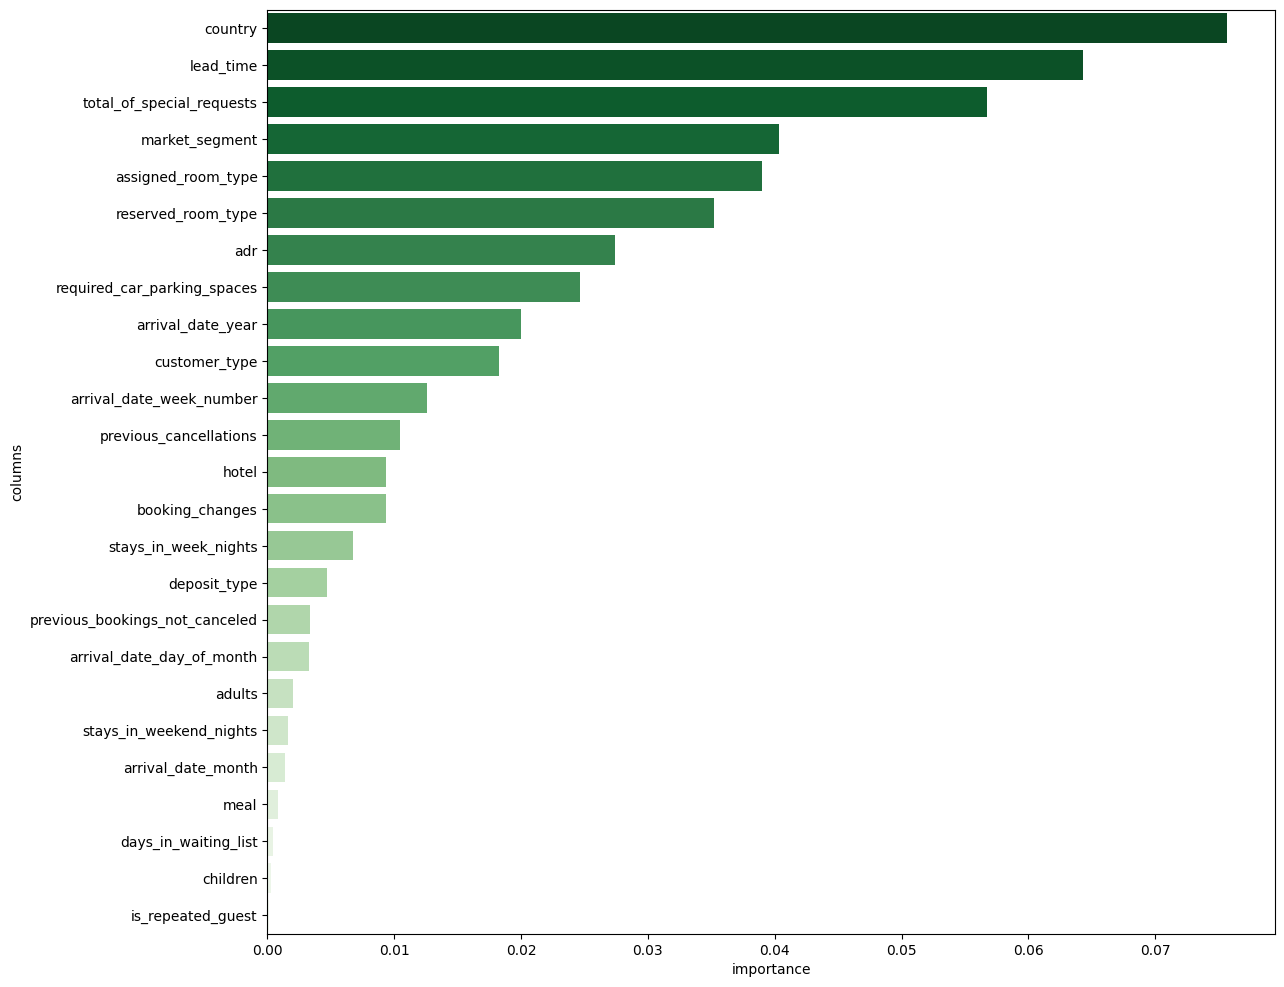

In [56]:
plt.figure(figsize=(13,12))
sns.barplot(x="importance", y="columns", data=df_importance, palette="Greens_r")
plt.show()

In [57]:
# Creating a dataframe to keep the important values
df_importance = pd.DataFrame({'columns': X_test.columns, 'importance': result.importances_mean})

# Filter hanya fitur yang memiliki importance > 0
df_importance = df_importance.loc[df_importance['importance'] > 0].sort_values(['importance'], ascending=False).reset_index(drop=True)

# Save importance features to CSV
df_importance.to_csv("feature_importance_Hotel_Hotel_Booking.csv", index=False)

# Cek hasilnya
print(df_importance.head())


                     columns  importance
0                    country    0.075656
1                  lead_time    0.064328
2  total_of_special_requests    0.056776
3             market_segment    0.040368
4         assigned_room_type    0.038995


In [58]:
before = set(X_test.columns)
after = set(df_importance['columns'])

print("Fitur yang dihapus:", before - after)
print("Fitur yang dipertahankan:", after)

Fitur yang dihapus: {'distribution_channel', 'babies', 'agent', 'company', 'reservation_status', 'reservation_status_date'}
Fitur yang dipertahankan: {'adr', 'arrival_date_day_of_month', 'hotel', 'arrival_date_month', 'arrival_date_week_number', 'deposit_type', 'meal', 'required_car_parking_spaces', 'children', 'customer_type', 'country', 'total_of_special_requests', 'reserved_room_type', 'arrival_date_year', 'adults', 'days_in_waiting_list', 'booking_changes', 'stays_in_weekend_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'stays_in_week_nights', 'assigned_room_type', 'market_segment', 'is_repeated_guest', 'lead_time'}


In [59]:
print(X_test.isnull().sum())  # Cek jumlah missing values di setiap kolom

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             115
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3056
company                           20552
days_in_waiting_list                  0


In [60]:
y_pred=pipe.predict(X_test)

In [61]:
# We choose weighted fscore since we have imbalanced classification data.
print("Weighted f1 score is:",f1_score(y_test, y_pred, average='weighted'))

Weighted f1 score is: 0.8471906840663587


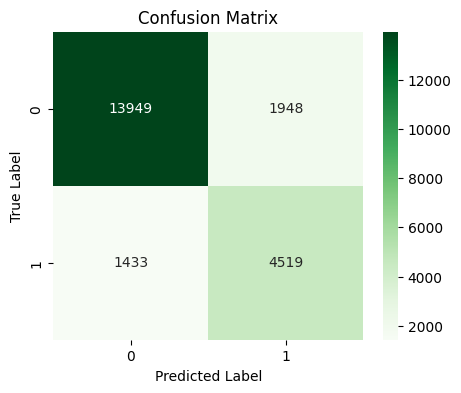

In [62]:
from sklearn.metrics import confusion_matrix
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix dengan warna hijau
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.metrics import classification_report
from rich import print

report = classification_report(y_test, y_pred, target_names=['0','1'])
print(report)

precision    recall  f1-score   support

           0       0.91      0.88      0.89     15897
           1       0.70      0.76      0.73      5952

    accuracy                           0.85     21849
   macro avg       0.80      0.82      0.81     21849
weighted avg       0.85      0.85      0.85     21849

In [64]:
# The confusion matrix helps us visualise the precision and recall. Its important for us that we are able to identify users who are cancelling correctly.
# We are able to predict users who cancelled (TP) 85% of the times. Thats good accuracy

Selecting importance feature by treshold 0.05,

[link text](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00472-4#:~:text=Threshold%2C%20also%20known%20as%20a,Random%20forest)

In [65]:
#from google.colab import files
#files.download("/content/feature_importance_Hotel_Booking.csv")

In [66]:
# Save feature important file
#df_importance.to_csv("/content/feature_importance_Hotel_Booking.csv", index=False)

In [67]:
# Save hasil
#y_pred = pipe.predict(X_test)  # Hasil prediksi
#df_prediksi = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Simpan ke CSV
#df_prediksi.to_csv("hasil_prediksi.csv", index=False)

In [68]:
#from google.colab import files
#files.download("/content/hasil_prediksi.csv")

In [69]:
#import os
#print(os.getcwd())  # Menampilkan lokasi penyimpanan file